# Accessing Data via yfinance in Python - Part 2

The Yahoo Finance system allows you to access data in response to queries from Python.  A popular package that does this is *yfinance* which is used in the examples here.

Some boxes on this page are just text - 'Markdown' - but others are Python code.  In the code boxes, any text has to have a '#' in front of it so it is not seen as a command - look for those in the code boxes.  Some of the code here is for you to use if you copy the file to another computer - it can't run in 'Binder' (or Google's 'Colab') hosted code sites.

To run a 'cell' of code, click in the box and then click the Play button.

In [31]:
import pandas as pd
import yfinance as yf
import os
import seaborn as sns
yf.__version__

'0.2.66'

In [3]:
#################################################################
#If code in this module does not work and on your own computer:
#################################################################

#install packages if it looks like they are not there:
pip install yfinance
pip install pandas
pip install seaborn #This is a scientific diagram package but has some very nice graphs in it

# update the yfinance package using command below, and then 
# 'refresh' the Kernel using the menu above

SyntaxError: invalid syntax (4259112952.py, line 7)

It is usually better to make the name of the data into a variable that can be easily changed - so often make a variable called 'symbol' or 'ticker' and then refer to that.

To change the asset you are investigating, simply re-type the line that defines the symbol / ticker variable and then run it again.  (You can also get data on a range of assets in one go as well - see later examples)

In [3]:
# Fetch historical stock data
symbol = 'AAPL'
stock_data = yf.download(symbol, start='2022-01-01', end='2023-01-01', progress=False)

# Display the first few rows of the dataset
print(stock_data.head())  #print often formats the contents of data objects better for the screen

C:\Users\james\AppData\Local\Temp\ipykernel_17232\257564355.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start='2022-01-01', end='2023-01-01', progress=False)


Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2022-01-03  178.270309  179.122444  174.058672  174.176201  104487900
2022-01-04  176.007782  179.181217  175.439697  178.877588   99310400
2022-01-05  171.326019  176.468151  171.051773  175.919659   94537600
2022-01-06  168.466003  171.698203  168.113400  169.151618   96904000
2022-01-07  168.632507  170.562032  167.515931  169.337715   86709100


In [7]:
import datetime as dt  #a useful package for python to understand data formats
symbol="AAPL"
actual_date = dt.date.today()
start_date = actual_date - dt.timedelta(weeks=20)
dat = yf.download(symbol, start=start_date, end=actual_date, progress=False)
print(dat.head(12))  #Print on screen the first 20 observations

Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2025-07-03  213.101334  214.199013  211.364984  211.704266  34955800
2025-07-07  209.508896  215.775700  208.361318  212.233156  50229000
2025-07-08  209.568771  210.985786  208.012051  209.658594  42848900
2025-07-09  210.696396  210.885999  206.784634  209.089778  48749400
2025-07-10  211.963745  213.031489  209.588740  210.067728  44443600
2025-07-11  210.716354  211.684318  209.419083  210.127598  39765800
2025-07-14  208.181686  210.466884  207.103954  209.488932  38840100
2025-07-15  208.670670  211.444828  208.481066  208.780439  42296300
2025-07-16  209.718460  211.953744  208.201649  209.858165  47490500
2025-07-17  209.578751  211.355010  209.149646  210.127598  48068100
2025-07-18  210.736313  211.345032  209.259427  210.426967  48974600
2025-07-21  212.033585  215.326654

C:\Users\james\AppData\Local\Temp\ipykernel_17232\4241085141.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dat = yf.download(symbol, start=start_date, end=actual_date, progress=False)


### Graphing Data


In [9]:
#You can call a specific part of the data

dat["Close"]

Ticker,AAPL
Date,
2025-07-03,213.101334
2025-07-07,209.508896
2025-07-08,209.568771
2025-07-09,210.696396
2025-07-10,211.963745
...,...
2025-11-13,272.950012
2025-11-14,272.410004
2025-11-17,267.459991


<Figure size 1200x600 with 0 Axes>

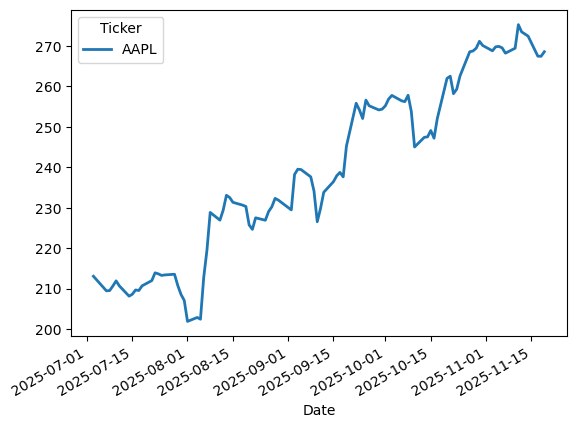

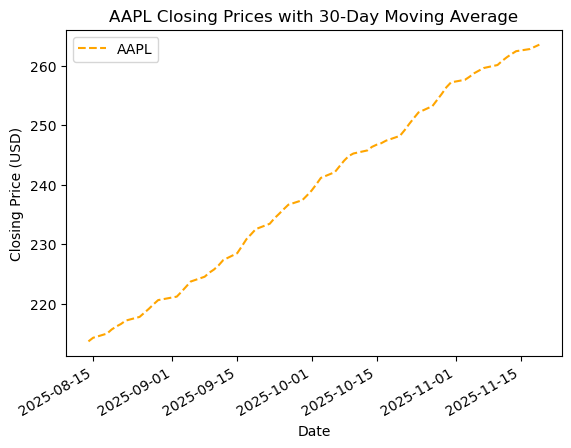

In [12]:
# Moving Average Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
dat['Close'].plot(label=f'{symbol} Closing Price', linewidth=2)
dat['Close'].rolling(window=30).mean().plot(label=f'{symbol} 30-Day Avg', linestyle='--', color='orange')
plt.title(f'{symbol} Closing Prices with 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()



In [15]:
#Find the ticker for an interesting company and try the following...
Ticker="NVDA"

And - to get an idea of the range of data available...

In [16]:
dat = yf.Ticker(Ticker)
dat.info

{'address1': '2788 San Tomas Expressway',
 'city': 'Santa Clara',
 'state': 'CA',
 'zip': '95051',
 'country': 'United States',
 'phone': '408 486 2000',
 'website': 'https://www.nvidia.com',
 'industry': 'Semiconductors',
 'industryKey': 'semiconductors',
 'industryDisp': 'Semiconductors',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': "NVIDIA Corporation, a computing infrastructure company, provides graphics and compute and networking solutions in the United States, Singapore, Taiwan, China, Hong Kong, and internationally. The Compute & Networking segment includes its Data Centre accelerated computing platforms and artificial intelligence solutions and software; networking; automotive platforms and autonomous and electric vehicle solutions; Jetson for robotics and other embedded platforms; and DGX Cloud computing services. The Graphics segment offers GeForce GPUs for gaming and PCs, the GeForce NOW game streaming service and 

In [ ]:
#Find a row that you want to individually call from above and fill in in the quote marks below
dat.info[""]
#e.gs
#dat.info["forwardEps"]
#dat.info['averageDailyVolume10Day']
#dat.info['bid']
#dat.info['ask']

In [20]:
#Getting in multiple securities in one go
tickers = yf.Tickers('msft aapl goog')
tickers

yfinance.Tickers object <MSFT,AAPL,GOOG>

In [ ]:
day=tickers.history(period="1d")

In [25]:
print(day["Close"])

Ticker            AAPL         AMD        AMZN        GOOG        META  \
Date                                                                     
2025-10-21  262.515503  238.029999  222.029999  251.339996  733.270020   
2025-10-22  258.199707  230.229996  217.949997  252.529999  733.409973   
2025-10-23  259.328583  234.990005  221.089996  253.729996  734.000000   
2025-10-24  262.565491  252.919998  224.210007  260.510010  738.359985   
2025-10-27  268.549652  259.670013  226.970001  269.929993  750.820007   
2025-10-28  268.739471  258.010010  229.250000  268.429993  751.440002   
2025-10-29  269.438812  264.329987  230.300003  275.170013  751.669983   
2025-10-30  271.137146  254.839996  222.860001  281.899994  666.469971   
2025-10-31  270.108154  256.119995  244.220001  281.820007  648.349976   
2025-11-03  268.789429  259.649994  254.000000  284.119995  637.710022   
2025-11-04  269.778473  250.050003  249.320007  278.059998  627.320007   
2025-11-05  269.878387  256.329987  25

In [26]:
tickers = yf.Tickers('msft aapl goog meta nflx nvda amd amzn')
mo=tickers.history(period="1mo")
delta=(mo["High"]-mo["Low"])/mo["Open"]
delta

[*********************100%***********************]  8 of 8 completed


Ticker,AAPL,AMD,AMZN,GOOG,META,MSFT,NFLX,NVDA
Date,,,,,,,,
2025-10-21,0.013212,0.034421,0.024401,0.041959,0.013247,0.010918,0.013550,0.016358
2025-10-22,0.028251,0.064387,0.015914,0.026387,0.022580,0.014430,0.039452,0.036878
2025-10-23,0.010041,0.031978,0.014247,0.012188,0.012672,0.010221,0.024936,0.017958
2025-10-24,0.018952,0.047009,0.015768,0.024913,0.013654,0.008875,0.018092,0.021595
2025-10-27,0.016876,0.041182,0.012563,0.022083,0.010324,0.010474,0.013610,0.018791
2025-10-28,0.006469,0.029251,0.023136,0.015581,0.017113,0.023545,0.021910,0.058223
2025-10-29,0.015969,0.036640,0.021841,0.028070,0.022060,0.017507,0.011411,0.035628
2025-10-30,0.020810,0.044514,0.025059,0.039353,0.046014,0.024223,0.016493,0.023154
2025-10-31,0.029460,0.033590,0.026070,0.030939,0.043469,0.026887,0.029763,0.028578


<Figure size 1200x600 with 0 Axes>

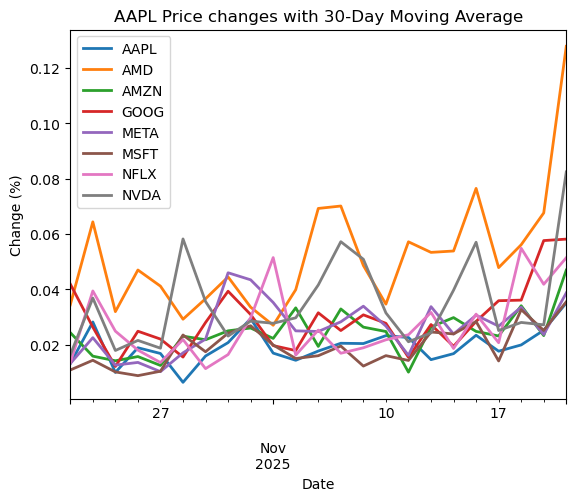

In [29]:
plt.figure(figsize=(12, 6))
delta.plot(label=f'{symbol} Change', linewidth=2)
plt.title(f'{symbol} Price changes with 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Change (%)')
plt.legend()
plt.show()

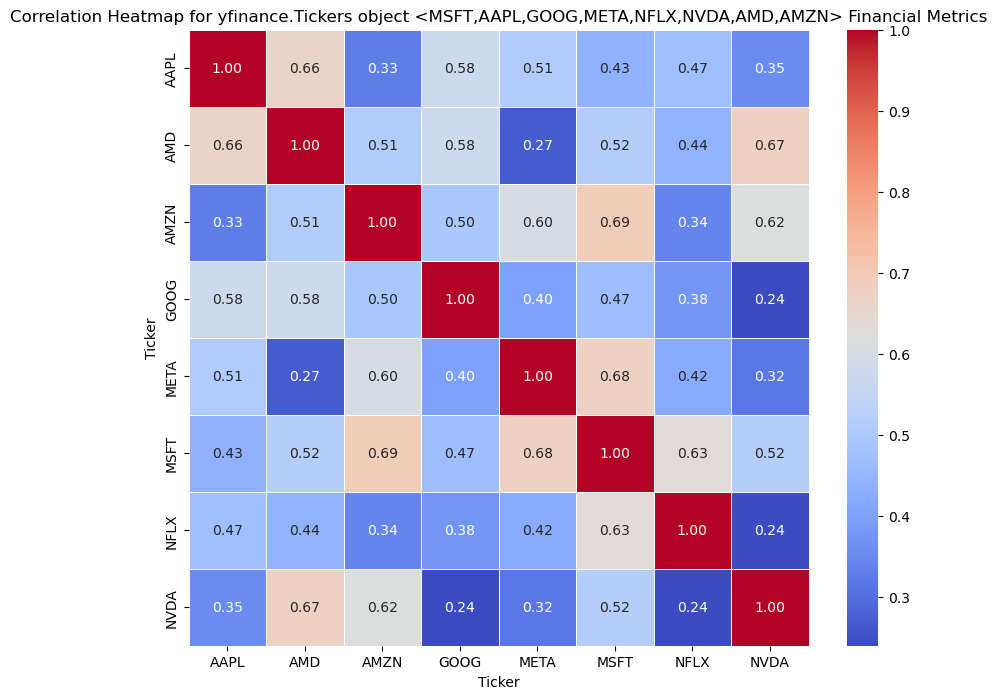

In [32]:
correlation_matrix = delta.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title(f'Correlation Heatmap for {tickers2} Financial Metrics')
plt.show()